<a href="https://colab.research.google.com/github/bishalpaul777/Data_Analysis_using_Python/blob/main/sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name:  "Forexify"- *Sales analysis and forecasting***

# **Problem Statement**

**In the dynamic landscape of modern business, obtaining actionable insights from sales data has become increasingly essential for organizations to stay competitive and thrive. The "Sales Insights" project aims to leverage advanced data analysis and visualization techniques to unravel hidden patterns, trends, and opportunities within sales data, thereby empowering decision-makers with the knowledge to make informed strategic choices and optimize sales performance.**

# **Let's Begin**

# **1. Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.cluster import KMeans
from google.colab import drive
import seaborn as sns
from sklearn.cluster import KMeans

# **2. Load The Dataset**

In [2]:
file_path = '/content/drive/MyDrive/Dataset/salesinsights.xlsx'
salesdata = pd.read_excel(file_path)

# **3. Dataset View and Information**

## **3.1:  View The Dataset**

In [3]:
salesdata.head(11)

,Order_Date,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,CustomerName,State,City
0,2018-03-01,B-25681,1096,658,7,Electronics,Electronic Games,COD,Harivansh,Uttar Pradesh,Mathura
1,2018-03-02,B-26055,5729,64,14,Furniture,Chairs,COD,Madhav,Delhi,Delhi
2,2018-03-03,B-25955,2927,146,8,Furniture,Bookcases,EMI,Madan Mohan,Uttar Pradesh,Mathura
3,2018-03-04,B-26093,2847,712,8,Electronics,Printers,Credit Card,Gopal,Maharashtra,Mumbai
4,2018-03-05,B-25602,2617,1151,4,Electronics,Phones,Credit Card,Vishakha,Madhya Pradesh,Indore
5,2018-03-06,B-25881,2244,247,4,Clothing,Trousers,Credit Card,Sudevi,Uttar Pradesh,Prayagraj
6,2018-03-07,B-25696,275,-275,4,Clothing,Saree,COD,Shiva,Maharashtra,Pune
7,2018-03-08,B-25687,387,-213,5,Clothing,Saree,UPI,Sarita,Maharashtra,Pune
8,2018-03-09,B-25643,50,-44,2,Clothing,Hankerchief,UPI,Shishu,Andhra Pradesh,Hyderabad
9,2018-03-10,B-25851,135,-54,5,Clothing,Kurti,COD,Vrinda,Maharashtra,Pune


## **3.2: Dataset Information**

In [4]:
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order_Date    1500 non-null   datetime64[ns]
 1   Order ID      1500 non-null   object        
 2   Amount        1500 non-null   int64         
 3   Profit        1500 non-null   int64         
 4   Quantity      1500 non-null   int64         
 5   Category      1500 non-null   object        
 6   Sub-Category  1500 non-null   object        
 7   PaymentMode   1500 non-null   object        
 8   CustomerName  1500 non-null   object        
 9   State         1500 non-null   object        
 10  City          1500 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 129.0+ KB


## **3.3: Dataset Rows & Columns Count**

In [5]:
salesdata.shape

(1500, 11)

It defines that there are 1500 Rows and 11 Columns present in the dataset.

## **3.4: Dataset Shape**

In [6]:
salesdata.size

16500

Total numbers of cells or data. It is determined by -- "**rows ✖️ columns**" = 1500 * 11 = 16500

## **3.5: Description of the Dataset**

In [7]:
salesdata.describe()

,Amount,Profit,Quantity
count,1500.000000,1500.00000,1500.000000
mean,291.847333,24.64200,3.743333
std,461.924620,168.55881,2.184942
min,4.000000,-1981.00000,1.000000
25%,47.750000,-12.00000,2.000000
50%,122.000000,8.00000,3.000000
75%,326.250000,38.00000,5.000000
max,5729.000000,1864.00000,14.000000


The describe() returns following statistics for each numeric column:

* **Count**: The number of non-null values in the column.

* **Mean**: The average value of the column.

* **Standard Deviation**: A measure of the spread or dispersion of the values.

* **Minimum**: The smallest value in the column.

* **25th Percentile (Q1)**: The value below which 25% of the data falls.

* **Median (50th Percentile or Q2)**: The middle value of the data. Also known as the median.

* **75th Percentile (Q3)**: The value below which 75% of the data falls.

* **Maximum**: The largest value in the column.

# **4. Dataset Variables and Description**

## **4.1: Dataset Variable**

In [9]:
salesdata.columns

Index(['Order_Date', 'Order ID', 'Amount', 'Profit', 'Quantity', 'Category',
       'Sub-Category', 'PaymentMode', 'CustomerName', 'State', 'City'],
      dtype='object')

## **4.2: Variable Description**

* **Order_Date**: Date when the order was placed.

* **Order ID**: Unique identifier for each order.

* **Amount**: Total amount of the order.

* **Profit**: Profit generated from the order.

* **Quantity**: Quantity of products ordered.

* **Category**: General category of the ordered products.

* **Sub-Category**: Specific sub-category of the ordered products.

* **PaymentMode**: Mode of payment used for the order.

* **CustomerName**: Name of the customer who placed the order.

* **State**: State where the order was delivered.

* **City**: City where the order was delivered.

# **5. Basic Visualization**

## **5.1: Total Sales**

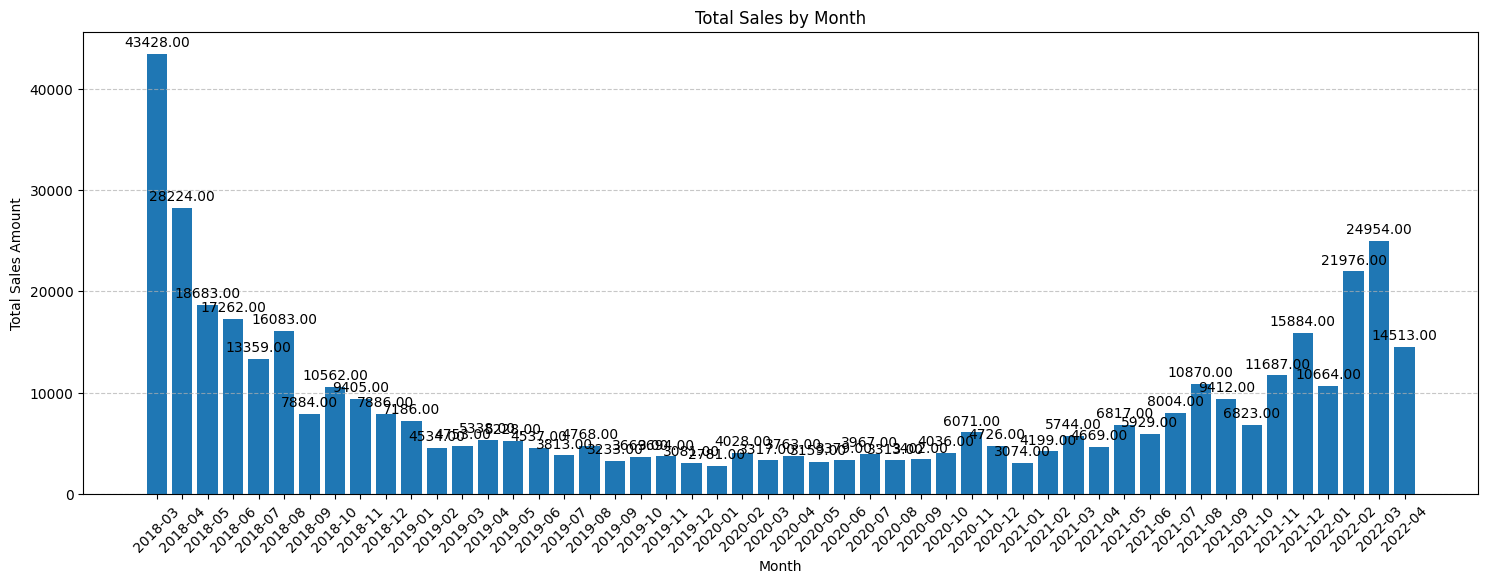

Total Sales Amount: 437771


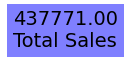

In [10]:
salesdata['Year'] = salesdata['Order_Date'].dt.year
salesdata['Month'] = salesdata['Order_Date'].dt.month  # Extract the month from the Order_Date column
monthly_sales = salesdata.groupby(['Year', 'Month'])['Amount'].sum().reset_index()

# Create a new figure for the monthly sales visualization
plt.figure(figsize=(18, 6))
bars = plt.bar(range(len(monthly_sales)), monthly_sales['Amount'])
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales by Month')
plt.xticks(range(len(monthly_sales)), [f'{year}-{month:02}' for year, month in zip(monthly_sales['Year'], monthly_sales['Month'])], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with the sales amount
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.show()


total_sales = salesdata['Amount'].sum()
print("Total Sales Amount:", total_sales)
plt.figure(figsize=(0.2, 0.2))
plt.text(0.2, 0.2, f"{total_sales:.2f}\nTotal Sales",
         fontsize=14,
         bbox=dict(facecolor='blue', alpha=0.5, edgecolor='none'))
plt.axis('off')
plt.show()

## **5.2: Total Profit**

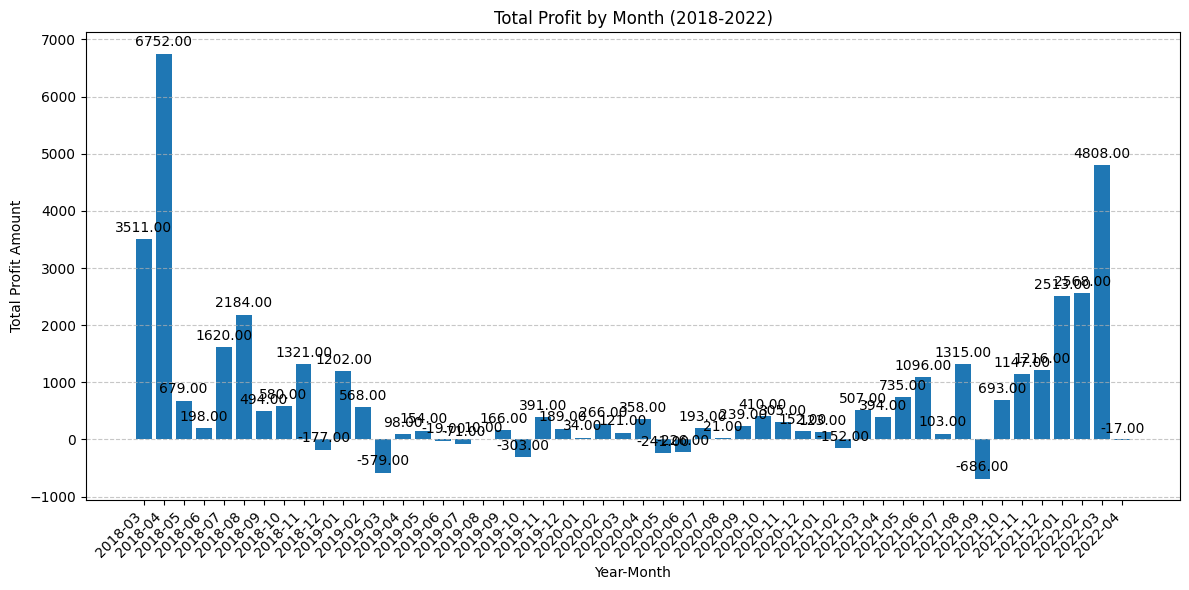

Total Profit Amount: 36963


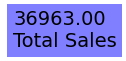

In [11]:
salesdata['Year'] = salesdata['Order_Date'].dt.year
salesdata['Month'] = salesdata['Order_Date'].dt.month
monthly_sales = salesdata.groupby(['Year', 'Month'])['Profit'].sum().reset_index()
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(monthly_sales)), monthly_sales['Profit'])
xtick_labels = [f"{year}-{month:02}" for year, month in zip(monthly_sales['Year'], monthly_sales['Month'])]
plt.xlabel('Year-Month')
plt.ylabel('Total Profit Amount')
plt.title('Total Profit by Month (2018-2022)')
plt.xticks(range(len(monthly_sales)), xtick_labels, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')
plt.tight_layout()
plt.show()

total_sales = salesdata['Profit'].sum()

print("Total Profit Amount:", total_sales)

plt.figure(figsize=(0.2, 0.2))
plt.text(0.2, 0.2, f"{total_sales:.2f}\nTotal Sales",
         fontsize=14,
         bbox=dict(facecolor='blue', alpha=0.5, edgecolor='none'))
plt.axis('off')
plt.show()

## **5.3: TopMost Profitable States**

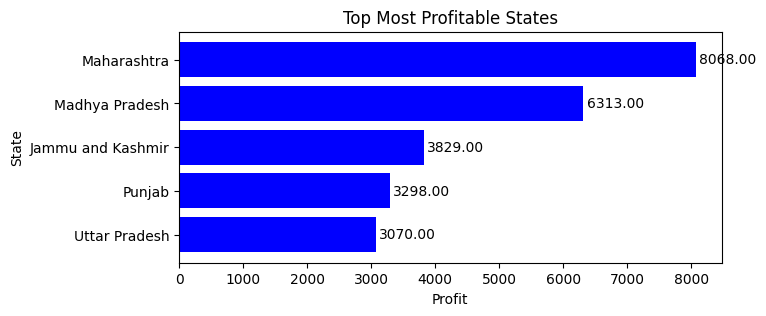

In [12]:
state_profit = salesdata.groupby('State')['Profit'].sum()
top_states = state_profit.sort_values(ascending=False).head(5)
plt.figure(figsize=(7, 3))
plt.barh(top_states.index, top_states.values, color='blue')
plt.xlabel('Profit')
plt.ylabel('State')
plt.title('Top Most Profitable States')
for i, v in enumerate(top_states.values):
    plt.text(v + 50, i, f'{v:.2f}', va='center', color='black', fontsize=10)
plt.gca().invert_yaxis()
plt.show()

## **5.4: TopMost Customers**

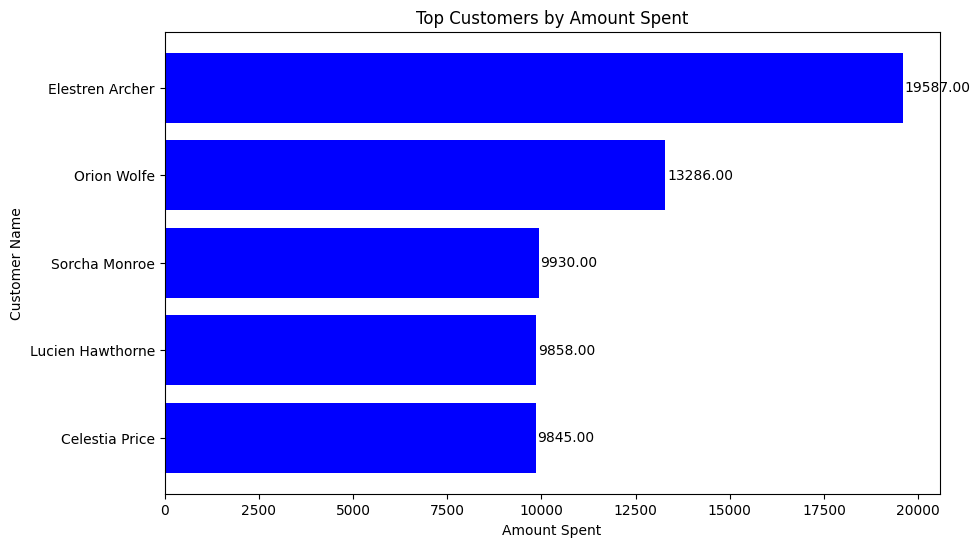

In [13]:
customer_amount = salesdata.groupby('CustomerName')['Amount'].sum()

# Sort the customers by total amount spent in descending order
top_customers = customer_amount.sort_values(ascending=False).head(5)  # You can adjust the number as needed

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visibility
plt.barh(top_customers.index, top_customers.values, color='blue')
plt.xlabel('Amount Spent')
plt.ylabel('Customer Name')
plt.title('Top Customers by Amount Spent')

# Annotate the bars with the amount values
for i, v in enumerate(top_customers.values):
    plt.text(v + 50, i, f'{v:.2f}', va='center', color='black', fontsize=10)

plt.gca().invert_yaxis()  # Invert the y-axis to display the highest spenders at the top
plt.show()

## **5.5: Payment Modes**

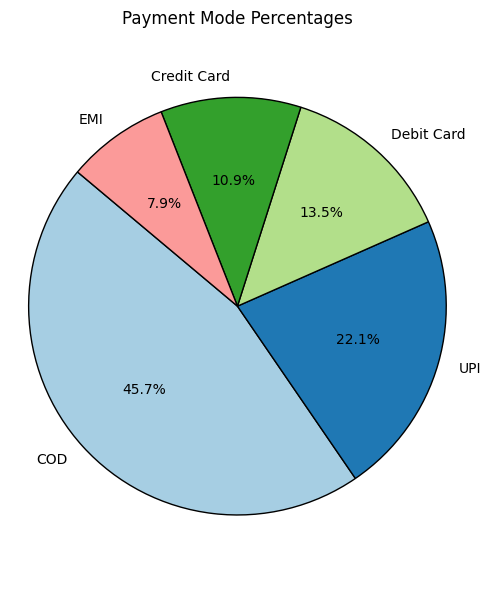

In [14]:
payment_mode_percentage = salesdata['PaymentMode'].value_counts(normalize=True) * 100
plt.figure(figsize=(5, 6))
plt.pie(payment_mode_percentage, labels=payment_mode_percentage.index, autopct='%.1f%%', startangle=140, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'})
plt.title('Payment Mode Percentages')
plt.axis('equal')
plt.tight_layout()
plt.show()

## **5.6: Top Profitable Categories**

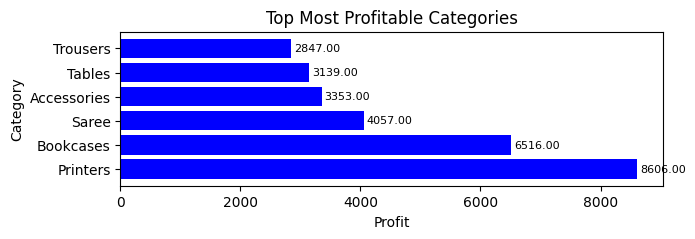

In [15]:
state_profit = salesdata.groupby('Sub-Category')['Profit'].sum()
top_states = state_profit.sort_values(ascending=False).head(6)
plt.figure(figsize=(7, 2))
plt.barh(top_states.index, top_states.values, color='blue')
plt.xlabel('Profit')
plt.ylabel('Category')
plt.title('Top Most Profitable Categories')
for i, v in enumerate(top_states.values):
    plt.text(v + 50, i, f'{v:.2f}', va='center', color='black', fontsize=8)
plt.show()


# **6. Analyze data Using Various Algorithms**





## **6.1: Time-Series Algorithm**

This algorithm is used to analyze the data to determine ***Monthly sales trends***

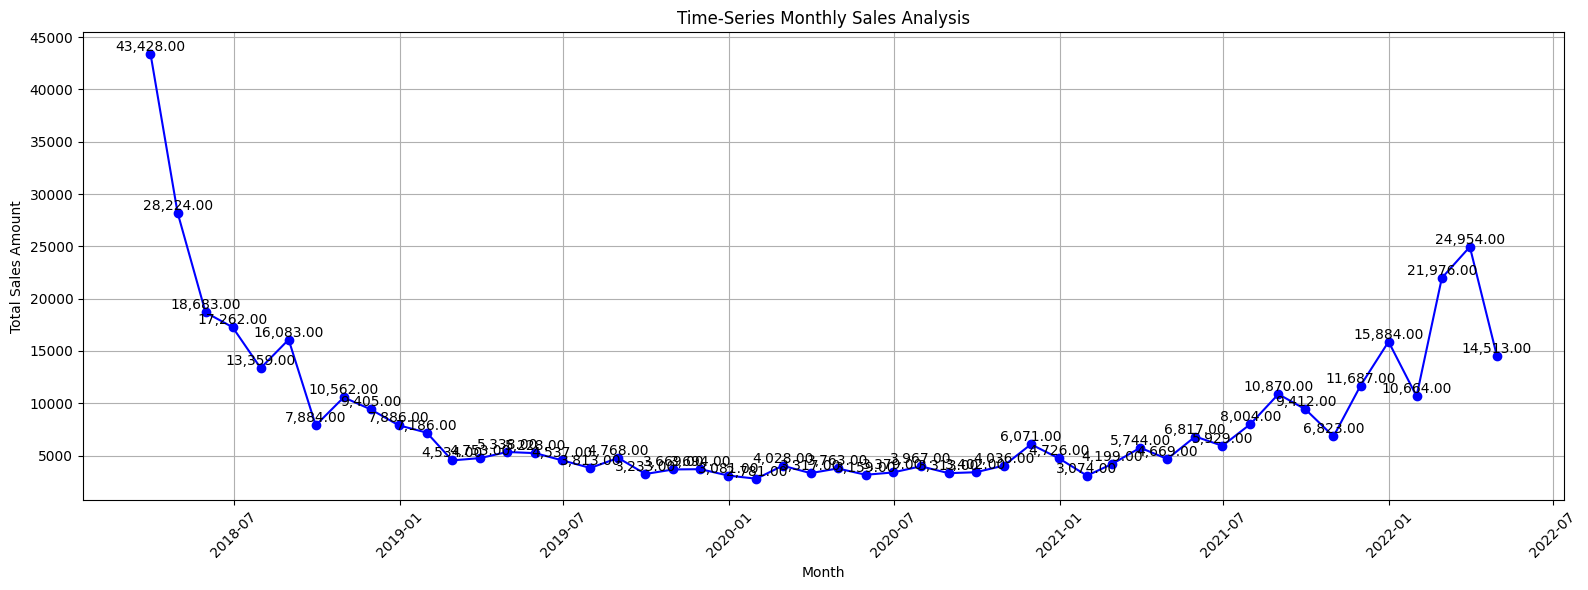

In [16]:
salesdata['Order_Date'] = pd.to_datetime(salesdata['Order_Date'])
salesdata.set_index('Order_Date', inplace=True)
monthly_data = salesdata['Amount'].resample('M').sum()
plt.figure(figsize=(16, 6))
plt.plot(monthly_data.index, monthly_data.values, marker='o', linestyle='-', color='b')
for x, y in zip(monthly_data.index, monthly_data.values):
    plt.text(x, y, f'{y:,.2f}', ha='center', va='bottom', color='black')
plt.title('Time-Series Monthly Sales Analysis')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## **6.2: Correlation Algorithm**

This algorithm used to Calculate correlation coefficients between numerical variables (e.g., 'Amount', 'Profit', 'Quantity') to understand relationships and dependencies between them.

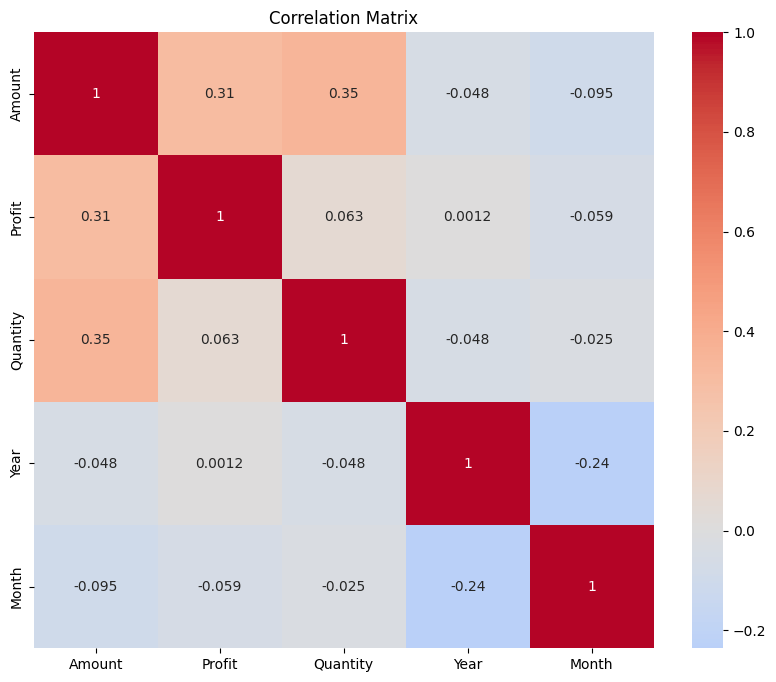

In [17]:
correlation_matrix = salesdata.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## **6.3: Linear Regression**

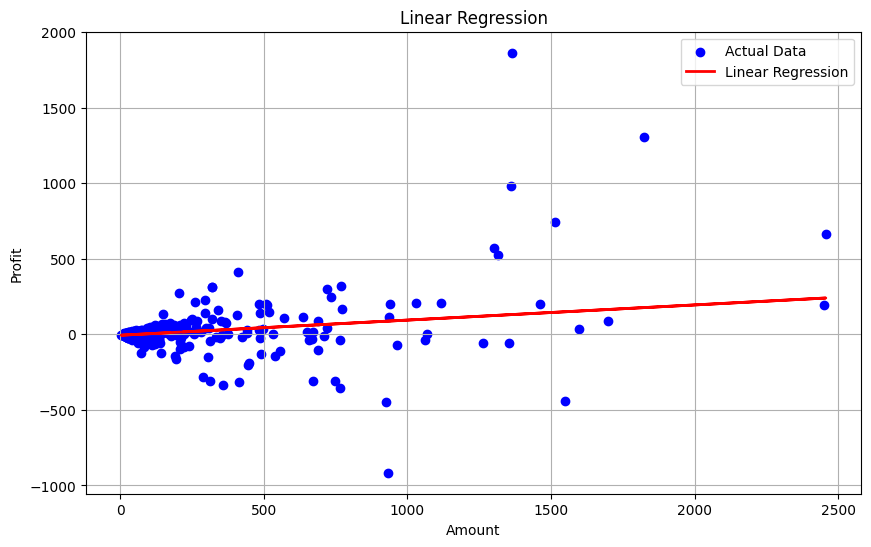

In [18]:
X = salesdata[['Amount']]
y = salesdata['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('Amount')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.show()

## **6.4: Time-Series Forecasting**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


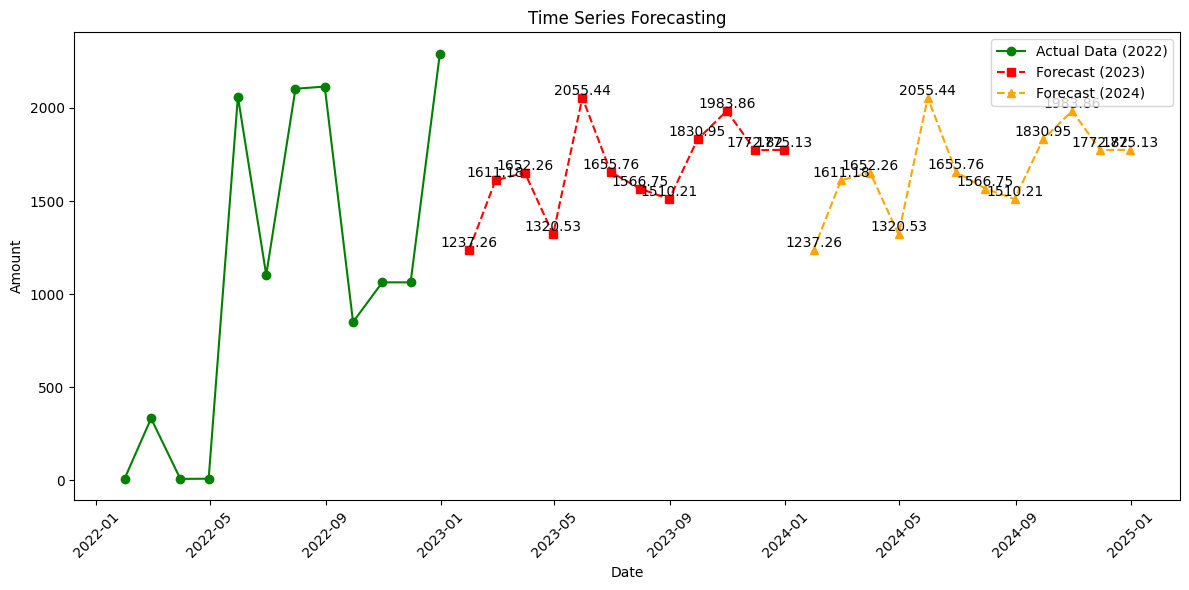

In [19]:
  amount_series = salesdata['Amount']
  ts_model = ExponentialSmoothing(amount_series, seasonal='add', seasonal_periods=12)
  ts_fit = ts_model.fit()
  forecast_2023 = ts_fit.forecast(steps=12)
  forecast_2024 = ts_fit.forecast(steps=12)
  date_range_2022 = pd.date_range(start='2022-01-01', periods=12, freq='M')
  date_range_2023 = pd.date_range(start='2023-01-01', periods=12, freq='M')
  date_range_2024 = pd.date_range(start='2024-01-01', periods=12, freq='M')
  plt.figure(figsize=(12, 6))
  plt.plot(date_range_2022, amount_series[-24:-12], label='Actual Data (2022)', color='green', marker='o')
  plt.plot(date_range_2023, forecast_2023, label='Forecast (2023)', color='red', linestyle='dashed', marker='s')
  plt.plot(date_range_2024, forecast_2024, label='Forecast (2024)', color='orange', linestyle='dashed', marker='^')
  for x, y in zip(date_range_2023, forecast_2023):
      plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', color='black')
  for x, y in zip(date_range_2024, forecast_2024):
      plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', color='black')
  plt.title('Time Series Forecasting')
  plt.xlabel('Date')
  plt.ylabel('Amount')
  plt.legend()
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()


## **6.5: Clustering For Demand Prediction**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-20-df75ca7a511b>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = salesdata.groupby('Cluster').mean()


<Figure size 1000x600 with 0 Axes>

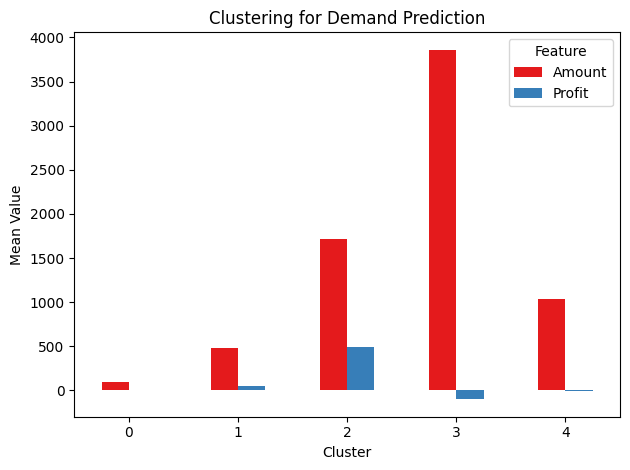

              Amount      Profit  Quantity         Year     Month
Cluster                                                          
0          96.085557    0.310948  3.351426  2019.785649  6.393744
1         482.251880   52.063910  4.387218  2019.454887  7.236842
2        1713.000000  497.244898  5.571429  2019.408163  3.673469
3        3859.142857  -99.142857  9.428571  2020.285714  3.571429
4        1034.021978   -9.835165  5.120879  2019.879121  6.318681


In [20]:
X_clustering = salesdata[['Amount', 'Profit']]
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(X_clustering)
cluster_labels = kmeans_model.labels_
salesdata['Cluster'] = cluster_labels
palette = sns.color_palette("Set1", n_colors=len(salesdata['Cluster'].unique()))
cluster_means = salesdata.groupby('Cluster').mean()
plt.figure(figsize=(10, 6))
cluster_means[['Amount', 'Profit']].plot(kind='bar', color=palette)
plt.title('Clustering for Demand Prediction')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(title='Feature', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print(cluster_means)

# **Conclusion**

In this Sales Insight project, a comprehensive analysis of the sales dataset was performed to gain valuable insights and make informed business decisions. The project covered various aspects of the sales data, providing a holistic view of the business performance.

Here are the key findings and conclusions drawn from the analyses conducted:

* **Sales Analysis**: A thorough exploration of the sales data revealed important trends and patterns. The project uncovered valuable information about sales performance, identifying peak sales periods and potential areas for improvement.

* **Total Profit Analysis**: By analyzing the total profit, the project identified periods of high profitability, enabling the business to focus on strategies that contribute to maximizing profits.

* **Top Profitable States Analysis**: The examination of profitable states allowed the project to highlight regions that are driving significant revenue. This insight assists in targeted marketing and resource allocation.

* **Payment Modes Analysis**: An in-depth analysis of payment modes revealed the preferred methods of payment among customers. This information can guide decisions on optimizing payment processing systems.

* **Time-Series Monthly Trends Analysis**: Through time-series analysis, the project identified monthly sales trends, enabling the business to adapt strategies based on seasonality and demand fluctuations.

* **Time Series Forecasting**: The implementation of time series forecasting provided insights into future sales trends, aiding in inventory planning and resource allocation.

* **Correlation Analysis**: By examining correlations between variables, the project uncovered relationships that impact sales and profitability. This understanding informs decision-making on pricing, promotions, and product offerings.

* **Linear Regression**: Utilizing linear regression, the project developed a predictive model for sales or profit based on relevant features. This model can assist in estimating future outcomes and optimizing business strategies.

* **Clustering for Demand Prediction**: Through clustering analysis, the project identified customer segments with similar purchasing behaviors. This knowledge facilitates targeted marketing campaigns and personalized customer experiences.

In conclusion, the Sales Insight project successfully leveraged a variety of analytical techniques to extract valuable insights from the sales dataset. These insights provide a foundation for data-driven decision-making and strategic planning. By understanding sales trends, customer behaviors, and profit drivers, the business is empowered to make informed choices that enhance performance and drive growth. This project exemplifies the power of data analysis in uncovering actionable insights for optimizing business operations and achieving greater success.